<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/multiple_regression_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Regression Analysis in R

Zia Ahmed, University at Buffalo

Multiple Regression Analysis is a statistical method used to examine the relationship between a dependent variable and two or more independent variables. It extends the concept of simple linear regression, which involves studying the relationship between a dependent variable and a single independent variable. In multiple regression, the goal is to understand how multiple independent variables together influence the variation in the dependent variable.

### Install rpy2

In [ ]:

!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install packages

In [ ]:
%%R
install.packages(c('tidyverse', 'Metrics', 'ggpmisc', 'broom', 'stargazer', 'report', 'performance', 'see', 'jtools', 'relaimpo'), lib='drive/My Drive/R/', repos='http://cran.rstudio.com/')


### Load packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(tidyverse)
library(broom)
library(stargazer)
library(report)
library(performance)
library(Metrics)
library(ggpmisc)
library(jtools)
library(relaimpo)


### Data

In this exercise we will use **gp_soil_data.csv**, The data can be found [here](https://github.com/zia207/r-colab/tree/main/Data/) for download.

In [ ]:
%%R
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Fit a Multiple Linear Model with continuous s predictors

We will develop MLR model with five continuous  predictors ('DEM', 'Slope', 'MAT', 'MAP','NDVI') to explain variability soil organic carbon.

In [ ]:
%%R
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, MAT, MAP,NDVI)

In [ ]:
%%R
# fit MLR model
mlr_01<-lm(SOC~DEM+Slope+MAT+MAP+NDVI, df)
summary(mlr_01)


Call:
lm(formula = SOC ~ DEM + Slope + MAT + MAP + NDVI, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5216  -2.1087  -0.4608   1.3395  16.3788 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.2088309  1.8002202   1.227 0.220457    
DEM         -0.0003853  0.0005465  -0.705 0.481201    
Slope        0.1660845  0.0632881   2.624 0.008972 ** 
MAT         -0.3239459  0.0821817  -3.942 9.34e-05 ***
MAP          0.0061026  0.0016366   3.729 0.000216 ***
NDVI         8.6687410  2.0697085   4.188 3.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.812 on 461 degrees of freedom
Multiple R-squared:  0.4354,	Adjusted R-squared:  0.4293 
F-statistic: 71.09 on 5 and 461 DF,  p-value: < 2.2e-16



#### Create a regression summary table

We can create a regression summary table with **tidy()** function from the broom and **stargazer()** function from stargazer packages.

In [ ]:
%%R
broom::tidy(mlr_01)

# A tibble: 6 × 5
  term         estimate std.error statistic   p.value
  <chr>           <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)  2.21      1.80         1.23  0.220    
2 DEM         -0.000385  0.000547    -0.705 0.481    
3 Slope        0.166     0.0633       2.62  0.00897  
4 MAT         -0.324     0.0822      -3.94  0.0000934
5 MAP          0.00610   0.00164      3.73  0.000216 
6 NDVI         8.67      2.07         4.19  0.0000337


In [ ]:
%%R
stargazer::stargazer(mlr_01,type="text")


                        Dependent variable:    
                    ---------------------------
                                SOC            
-----------------------------------------------
DEM                           -0.0004          
                              (0.001)          
                                               
Slope                        0.166***          
                              (0.063)          
                                               
MAT                          -0.324***         
                              (0.082)          
                                               
MAP                          0.006***          
                              (0.002)          
                                               
NDVI                         8.669***          
                              (2.070)          
                                               
Constant                       2.209           
                              (1.800)  

#### Genrate Report

We can generate report for linear model using **report()** function of **report** package:

In [ ]:
%%R
report::report(mlr_01)

We fitted a linear model (estimated using OLS) to predict SOC with DEM, Slope,
MAT, MAP and NDVI (formula: SOC ~ DEM + Slope + MAT + MAP + NDVI). The model
explains a statistically significant and substantial proportion of variance (R2
= 0.44, F(5, 461) = 71.09, p < .001, adj. R2 = 0.43). The model's intercept,
corresponding to DEM = 0, Slope = 0, MAT = 0, MAP = 0 and NDVI = 0, is at 2.21
(95% CI [-1.33, 5.75], t(461) = 1.23, p = 0.220). Within this model:

  - The effect of DEM is statistically non-significant and negative (beta =
-3.85e-04, 95% CI [-1.46e-03, 6.89e-04], t(461) = -0.70, p = 0.481; Std. beta =
-0.06, 95% CI [-0.22, 0.11])
  - The effect of Slope is statistically significant and positive (beta = 0.17,
95% CI [0.04, 0.29], t(461) = 2.62, p = 0.009; Std. beta = 0.15, 95% CI [0.04,
0.27])
  - The effect of MAT is statistically significant and negative (beta = -0.32,
95% CI [-0.49, -0.16], t(461) = -3.94, p < .001; Std. beta = -0.26, 95% CI
[-0.39, -0.13])
  - The effect of

#### Model Performance

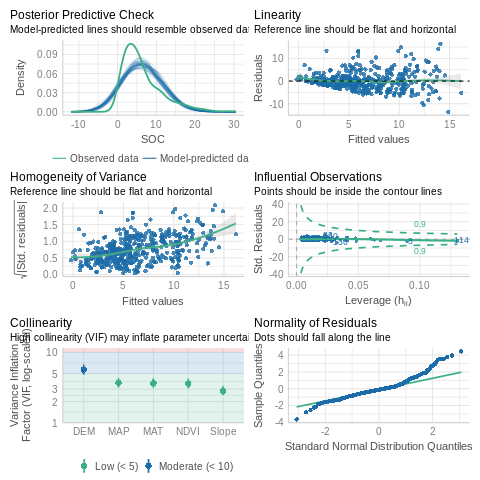

In [ ]:
%%R
performance::check_model(mlr_01)

### Fit a Multiple Linear Model with continous and catagorical predictors

Now we will update the MLR model by adding tow categorical variables.

In [ ]:
%%R
# Create a data-frame
df_02<-mf %>% dplyr::select(SOC, DEM, Slope, MAT, MAP,NDVI, NLCD, FRG)

In [ ]:
%%R
# fit MLR model
mlr_02<-lm(SOC~DEM+Slope+MAT+MAP+NDVI+NLCD+FRG, df_02)

In [ ]:
%%R
stargazer::stargazer(mlr_02,type="text")


                             Dependent variable:    
                         ---------------------------
                                     SOC            
----------------------------------------------------
DEM                                -0.0004          
                                   (0.001)          
                                                    
Slope                              0.155**          
                                   (0.069)          
                                                    
MAT                               -0.400***         
                                   (0.101)          
                                                    
MAP                               0.007***          
                                   (0.002)          
                                                    
NDVI                              6.828***          
                                   (2.452)          
                                             

#### Create a report

In [ ]:
%%R
report::report(mlr_02)

We fitted a linear model (estimated using OLS) to predict SOC with DEM, Slope,
MAT, MAP, NDVI, NLCD and FRG (formula: SOC ~ DEM + Slope + MAT + MAP + NDVI +
NLCD + FRG). The model explains a statistically significant and substantial
proportion of variance (R2 = 0.45, F(13, 453) = 28.67, p < .001, adj. R2 =
0.44). The model's intercept, corresponding to DEM = 0, Slope = 0, MAT = 0, MAP
= 0, NDVI = 0, NLCD = Forest and FRG = Fire Regime Group I, is at 2.53 (95% CI
[-3.04, 8.09], t(453) = 0.89, p = 0.372). Within this model:

  - The effect of DEM is statistically non-significant and negative (beta =
-4.48e-04, 95% CI [-1.79e-03, 8.92e-04], t(453) = -0.66, p = 0.511; Std. beta =
-0.07, 95% CI [-0.27, 0.14])
  - The effect of Slope is statistically significant and positive (beta = 0.16,
95% CI [0.02, 0.29], t(453) = 2.27, p = 0.024; Std. beta = 0.14, 95% CI [0.02,
0.27])
  - The effect of MAT is statistically significant and negative (beta = -0.40,
95% CI [-0.60, -0.20], t(453) = -3.98, p 

#### Model Performance

In [ ]:
%%R
performance::model_performance(mlr_02)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |  RMSE | Sigma
------------------------------------------------------------------
2585.591 | 2586.655 | 2647.786 | 0.451 |     0.436 | 3.733 | 3.790


#### Model comparison

The **compare_performance()** function can be used to compare the performance and quality of several models (including models of different types). We can easily compute and a composite index of model performance and sort the models from the best one to the worse.

In [ ]:
%%R
performance::compare_performance(mlr_01, mlr_02, rank = TRUE)

# Comparison of Model Performance Indices

Name   | Model |    R2 | R2 (adj.) |  RMSE | Sigma | AIC weights | AICc weights | BIC weights | Performance-Score
-----------------------------------------------------------------------------------------------------------------
mlr_02 |    lm | 0.451 |     0.436 | 3.733 | 3.790 |       0.216 |        0.155 |    1.73e-08 |            57.14%
mlr_01 |    lm | 0.435 |     0.429 | 3.787 | 3.812 |       0.784 |        0.845 |       1.000 |            42.86%


#### Visualisation of indices of models' performance

Finally, we provide convenient visualization (the see package must be installed).

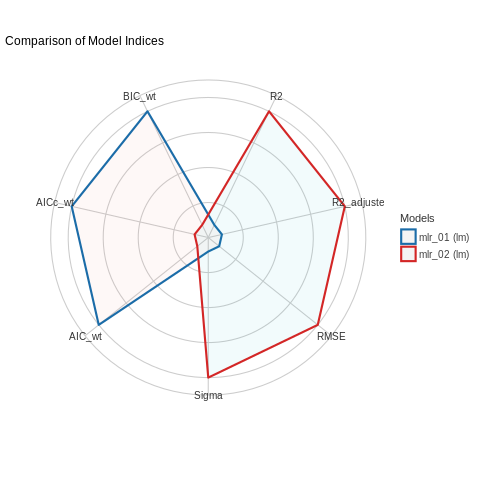

In [ ]:
%%R
plot(compare_performance(mlr_01, mlr_02, rank = TRUE))

#### Testing models

**test_performance()** and **test_bf**,  carries out the most relevant and appropriate tests based on the input (for instance, whether the models are nested or not).

In [ ]:
%%R
performance::test_performance(mlr_01, mlr_02)

Name   | Model |       BF | df | df_diff |  Chi2 |     p
--------------------------------------------------------
mlr_01 |    lm |          |  7 |         |       |      
mlr_02 |    lm | 1.73e-08 | 15 |    8.00 | 13.42 | 0.098
Models were detected as nested and are compared in sequential order.


### Regression Model visualization by jtools

Th "jtools" package consists of a series of functions to automate visualization regression model.

#### Console regression summaries

summ() is a replacement for summary() that provides the user several options for formatting regression summaries. It supports glm, svyglm, and merMod objects as input as well. It supports calculation and reporting of robust standard errors via the sandwich package.

In [ ]:
%%R
jtools::summ(mlr_02)

MODEL INFO:
Observations: 467
Dependent Variable: SOC
Type: OLS linear regression 

MODEL FIT:
F(13,453) = 28.67, p = 0.00
R² = 0.45
Adj. R² = 0.44 

Standard errors: OLS
-------------------------------------------------------------
                                  Est.   S.E.   t val.      p
------------------------------ ------- ------ -------- ------
(Intercept)                       2.53   2.83     0.89   0.37
DEM                              -0.00   0.00    -0.66   0.51
Slope                             0.16   0.07     2.27   0.02
MAT                              -0.40   0.10    -3.98   0.00
MAP                               0.01   0.00     3.80   0.00
NDVI                              6.83   2.45     2.78   0.01
NLCDHerbaceous                   -1.47   0.88    -1.67   0.10
NLCDPlanted/Cultivated           -1.70   0.99    -1.72   0.09
NLCDShrubland                    -1.16   0.80    -1.46   0.15
FRGFire Regime Group II           2.90   1.04     2.79   0.01
FRGFire Regime Group II

You can also get variance inflation factors (VIFs) and partial/semipartial (AKA part) correlations. Partial correlations are only available for OLS models. You may also substitute confidence intervals in place of standard errors and you can choose whether to show p values.

In [ ]:
%%R
jtools::summ(mlr_02,
     scale = TRUE,
     vifs = TRUE,
     part.corr = TRUE,
     confint = TRUE,
     pvals = FALSE)

MODEL INFO:
Observations: 467
Dependent Variable: SOC
Type: OLS linear regression 

MODEL FIT:
F(13,453) = 28.67, p = 0.00
R² = 0.45
Adj. R² = 0.44 

Standard errors: OLS
----------------------------------------------------------------------
                                  Est.    2.5%   97.5%   t val.    VIF
------------------------------ ------- ------- ------- -------- ------
(Intercept)                       5.36    3.41    7.31     5.40       
DEM                              -0.34   -1.38    0.69    -0.66   8.94
Slope                             0.73    0.10    1.36     2.27   3.37
MAT                              -1.64   -2.45   -0.83    -3.98   5.53
MAP                               1.40    0.68    2.12     3.80   4.40
NDVI                              1.11    0.33    1.89     2.78   5.11
NLCDHerbaceous                   -1.47   -3.20    0.26    -1.67   9.63
NLCDPlanted/Cultivated           -1.70   -3.64    0.25    -1.72   9.63
NLCDShrubland                    -1.16   -2.73  

### Note:

Variance Inflation factors (VIFs): Variance inflation factors (VIFs) are a measure of multicollinearity in regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to unreliable estimates of the regression coefficients.

VIF is calculated for each independent variable in the regression model, and it represents the extent to which that variable's variance is inflated by the presence of other independent variables in the model. Specifically, VIF measures the ratio of the variance of the coefficient estimate for a particular independent variable in a model that includes all the independent variables, to the variance of the coefficient estimate for that same variable in a model that includes only that variable and the constant.

A VIF of 1 indicates that there is no multicollinearity between the independent variable and the other variables in the model. Generally, a VIF greater than 5 or 10 is considered high, indicating that multicollinearity is a potential issue.


Partial/semipartial (AKA part) correlations: Partial or semipartial (also known as part) correlations are a statistical technique used to determine the degree of association between two variables while controlling for the effects of one or more additional variables.

Partial correlations measure the association between two variables, while controlling for the effects of other variables in the analysis. It calculates the correlation coefficient between two variables while holding all other variables constant. Partial correlation is used to determine the unique contribution of each variable in the relationship between two other variables.

Semipartial correlations, on the other hand, measure the degree of association between two variables while controlling for the effects of one additional variable. It is also known as a part correlation, as it quantifies the unique variance that a particular independent variable explains in the dependent variable, after controlling for the other independent variables in the analysis.

Partial and semipartial correlations are useful in situations where two or more variables are highly correlated, and it is difficult to determine their individual effects on the dependent variable. By controlling for the effects of other variables, these correlations can provide a more accurate estimate of the strength of the relationship between two variables. They are commonly used in regression analysis, where the goal is to determine the unique contribution of each independent variable in predicting the dependent variable.


#### Plotting model predictions (effect_plot())

Sometimes the best way to understand your model is to look at the predictions it generates. Rather than look at coefficients, effect_plot() lets you plot predictions across values of a predictor variable alongside the observed data.

And a new feature in version 2.0.0 lets you plot partial residuals instead of the raw observed data, allowing you to assess model quality after accounting for effects of control variables.


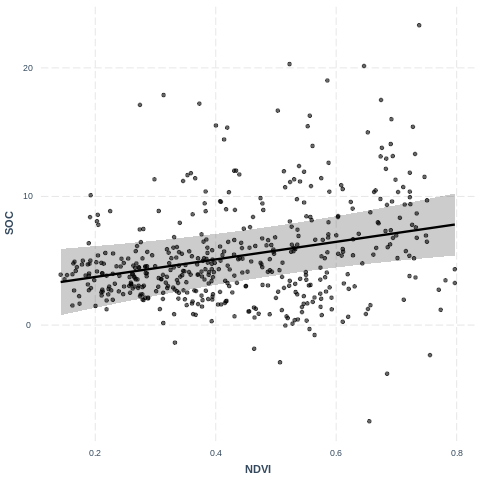

In [ ]:
%%R
jtools::effect_plot(mlr_02, pred = NDVI, interval = TRUE,  partial.residuals = TRUE)

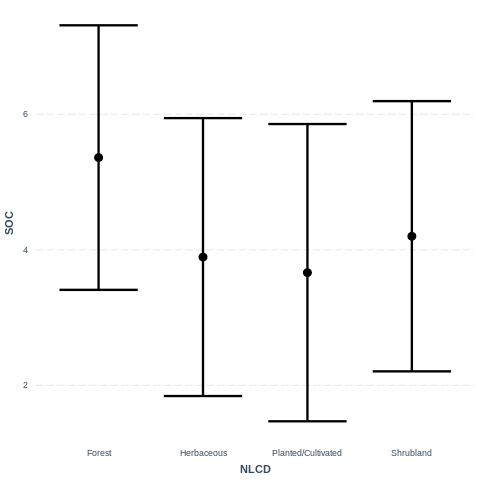

In [ ]:
%%R
jtools::effect_plot(mlr_02, pred =NLCD, interval = TRUE)

### Relative Importance

The **relaimpo** package provides measures of relative importance for each of the predictors in the model. See help(calc.relimp) for details on the four measures of relative importance provided.

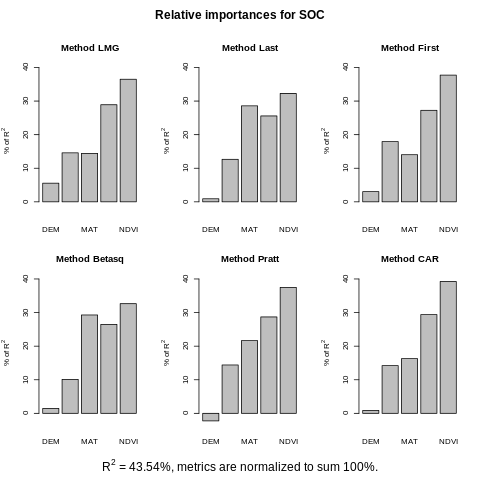

In [ ]:
%%R
# Calculate Relative Importance for Each Predictor
rvip<-calc.relimp(mlr_01,
                 type = c("lmg", "last", "first", "betasq", "pratt", "car"),
                 rela=TRUE)
plot(rvip)

### Note:
lmg: is the R2 contribution averaged over orderings among regressors, cf. e.g. Lindeman, Merenda and Gold 1980, p.119ff or Chevan and Sutherland (1991).

pmvd: is the proportional marginal variance decomposition as proposed by Feldman (2005) (non-US version only). It can be interpreted as a weighted average over orderings among regressors, with data-dependent weights.

last: is each variables contribution when included last, also sometimes called usefulness.

first: is each variables contribution when included first, which is just the squared covariance between y and the variable.

betasq: is the squared standardized coefficient.

pratt: is the product of the standardized coefficient and the correlation.

genizi: is the R2 decomposition according to Genizi 1993

car: is the R2 decomposition according to Zuber and Strimmer 2010, also available from package care (squares of scores produced by function carscore

### Further Reading

1.  [Multiple Linear Regression](https://www.statmethods.net/stats/regression.html)

2.  [report](https://github.com/easystats/report)

3.  [performance](https://easystats.github.io/performance/)

4.  [jtools](https://jtools.jacob-long.com/index.html)